<a href="https://colab.research.google.com/github/myusuf1982/Prediksi-Saham/blob/main/Tinggal_hubungan_in_dan_out1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
from keras.layers import Input, LSTM, Concatenate, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# data preparation
data = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")
#data =data[:50] # Juml row maksimal yang mau diambil sample 15 row

# memilih kolom open dan close saja
#data = data[['Open', 'Close','High','Low','Adj Close']] # all = Tanggal,Open,High,Low,Close,Adj Close,Volume
data = data[['Open']]

data.head()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
#print(data)

In [124]:
# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(len(data) * 0.9) #226 total 252
train_data = data[:train_size] # 90% = 226 -252 = 26  /Train 90%
test_data = data[train_size:]                        #/ Test 10%

original_array=np.array(train_data) #trainX & trainY
train_data = original_array.ravel()   
#print(train_data)

original_array1=np.array(test_data) #testX & testY
test_data = original_array1.ravel()


#input data
open_data =train_data # data['Open'].values
close_data = train_data # data['Close'].values
high_data = train_data # data['High'].values
low_data = train_data # data['Low'].values
volume_data = train_data #  data['Volume'].values

#reshape data
open_data = open_data.reshape((len(open_data), 1,1))
close_data = close_data.reshape((len(close_data),1, 1))
high_data = high_data.reshape((len(high_data), 1,1))
low_data = low_data.reshape((len(low_data), 1,1))
volume_data = volume_data.reshape((len(volume_data),1, 1))
#print(open_data)

In [125]:
#input layer / Setting variable jadi 3 dimensi
open_in = Input(shape=(1,1))
close_in = Input(shape=(1,1))
high_in = Input(shape=(1,1))
low_in = Input(shape=(1,1))
volume_in = Input(shape=(1,1))

#LSTM layer
open_lstm = LSTM(50)(open_in)
close_lstm = LSTM(50)(close_in)
high_lstm = LSTM(50)(high_in)
low_lstm = LSTM(50)(low_in)
volume_lstm = LSTM(50)(volume_in)



In [126]:
#concatenate layer
merged = Concatenate()([open_lstm, close_lstm, high_lstm, low_lstm, volume_lstm])

#output layer
output = Dense(1)(merged)

#model
model = Model([open_in, close_in, high_in, low_in, volume_in], output)
model.compile(loss='mean_absolute_error', optimizer='adam')

#fit model
model.fit([open_data, close_data, high_data, low_data, volume_data], open_data, epochs=5, batch_size=32)
#model.fit([open_data, close_data, high_data, low_data, volume_data], data['Next_Close'], epochs=5, batch_size=32) # buatkan datanya

Epoch 1/5
8/8 [==============================] - 10s 6ms/step - loss: 0.4134
Epoch 2/5
8/8 [==============================] - 0s 7ms/step - loss: 0.3280
Epoch 3/5
8/8 [==============================] - 0s 6ms/step - loss: 0.2468
Epoch 4/5
8/8 [==============================] - 0s 7ms/step - loss: 0.1760
Epoch 5/5
8/8 [==============================] - 0s 7ms/step - loss: 0.1355


8/8 [==============================] - 0s 7ms/step - loss: 0.1236
Absolute Mean Error:  0.12363032251596451


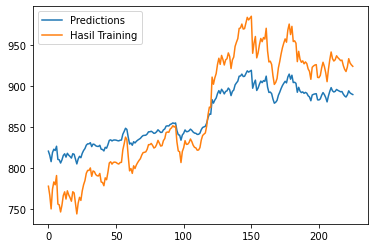

[[820.7202 ]
 [815.6642 ]
 [808.0411 ]
 [819.00964]
 [823.1279 ]
 [821.5254 ]
 [826.7334 ]
 [810.73773]
 [810.3062 ]
 [806.35175]
 [810.1227 ]
 [815.5121 ]
 [817.56433]
 [813.5275 ]
 [818.146  ]
 [815.88544]
 [814.2869 ]
 [812.3272 ]
 [817.6381 ]
 [816.9645 ]
 [811.151  ]
 [805.2634 ]
 [811.275  ]
 [814.5033 ]
 [812.787  ]
 [818.07666]
 [821.5532 ]
 [823.8881 ]
 [828.0024 ]
 [829.6309 ]
 [829.60297]
 [831.02826]
 [826.29205]
 [829.333  ]
 [828.90485]
 [827.2864 ]
 [826.608  ]
 [826.50574]
 [827.90936]
 [823.09546]
 [822.8267 ]
 [821.00244]
 [825.42847]
 [824.3705 ]
 [828.63495]
 [833.8269 ]
 [834.5087 ]
 [833.17346]
 [834.1725 ]
 [834.33124]
 [834.1444 ]
 [833.5515 ]
 [833.2295 ]
 [834.06506]
 [834.2239 ]
 [841.2686 ]
 [844.70654]
 [848.5617 ]
 [847.10144]
 [837.68835]
 [829.3795 ]
 [830.69275]
 [827.9559 ]
 [832.2357 ]
 [830.7021 ]
 [832.70215]
 [834.1071 ]
 [835.27966]
 [836.3035 ]
 [838.31573]
 [839.7212 ]
 [839.8899 ]
 [840.1571 ]
 [841.6065 ]
 [844.2553 ]
 [844.2553 ]
 [844.94165]

In [128]:
#predict
predictions = model.predict([open_data, close_data, high_data, low_data, volume_data])

#evaluate
error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], open_data)
#error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], data['Close'])
print("Absolute Mean Error: ", error)
train_data1=train_data

# inverting data kembali ke nilai asli
predictions = scaler.inverse_transform(predictions) #  2D
train_data=train_data.reshape(-1, 1) #ubah ke 2D
train_data   = scaler.inverse_transform(train_data)

#test_data   = scaler.inverse_transform(test_data)
#testPredict = scaler.inverse_transform(testPredict)                       #Error
#testY = scaler.inverse_transform(testY)     

#plot
plt.plot(predictions, label='Predictions')
#plt.plot(data['Next_Close'], label='Actual')
#plt.plot(new_array1, label='Actual') # buatkan datanya
plt.plot(train_data, label='Hasil Training') # buatkan datanya
plt.legend()
plt.show()
print(predictions)
print(train_data1)